# Brain Tumor Detection using Mask R-CNN 

<h6>Varshik Chebrolu

<h3>Introduction

<p>The use of machine learning and artificial intelligence techniques to reduce task load and boost production has become the standard in many sectors. Machine learning algorithms are also improving and producing solutions based on the needs. Similarly, these algorithms have made their way into medical departments, where they may be used to detect or identify items that are difficult to see with the naked eye. These may be highly useful for physicians, and the importance of these algorithms operating flawlessly is quite great, because they can assist in saving someone's life.
    
<p>One use of machine learning techniques is the identification of cancers or other abnormalities in various organs. The target of this project is to use MRI images to identify malignancies in the brain. A brain tumor is an uncontrolled growth of tissues in the human brain that, if malignant, can be deadly. Once the algorithm has identified the tumor, the data may be utilized to further diagnose and mitigate the damage.

<p>The tumor is detected using image segmentations, and a deep learning approach, Mask R-CNN, is used in this study. Mask R-CNN is a deep learning algorithm that detects objects and also produces a mask around the identified item. There are several publications, open source modules, and basic guidelines available to help you learn how to utilize Mask R-CNN to carry out the operation.

<h3>Brain Tumor

<p>Having some form of visual representations of the abnormality/illness is a significant aspect in treating or identifying the condition in the medical field. Various medical technologies, such as MRI scans, CT scans, and X-rays, give this type of visual picture representation. Medical image analysis and technologies are crucial in assisting practitioners and doctors in appropriately diagnosing sickness or abnormality.
    
<p>The visual representation image given by the MRI scan is the first step in diagnosing a brain tumor. A magnetic field is used in an MRI to provide a precise picture of the interior organs. The patient is given a specific dye called contrast medium in order to achieve a clear picture from the MRI scan. Different types of MRIs are available, and the findings of a neuro-test performed by a neurologist can assist choose which one to utilize. When an MRI reveals the presence of a tumor, the most common technique to determine the kind of brain tumor is to examine the findings of a biopsy/surgery sample of tissue.


<h3>Mask R-CNN

<p>Object identification is a computer vision problem that requires figuring out the identity, position, and kind of one or more items in an image. It's a complex challenge that needs the development of methods for item recognition, location, and categorization. Deep learning approaches have recently attained cutting-edge performance for object identification on common benchmark datasets and in computer vision contests. Convolutional neural networks are one of the most widely utilized techniques for object recognition.

<h6>Convolutional Neural Networks(CNN):</h6>
<p>Convolutional Neural Networks are the building blocks for image segmentation which is mainly used in computer vision.A convolutional neural network is a deep learning algorithm which takes the image,assign importance to certain objects of the image and differentiate from each other.The Convolutional Neural Network Architecture consists of three main layers:
<p>
<div><b>Convolutional layer :</b>It uses filters and kernels to abstract the input image as a feature map.
<div><b>Pooling layer :</b> This layer helps to downsample feature maps by summarizing the presence of features in patches of the feature map.
<div><b>Fully connected layer:</b>  Fully connected layers connect every each and every weight to the other weight.
   
<p>By combining the layers of a CNN, the neural network may learn how to detect and recognize the item of interest in an image. Simple Convolutional Neural Networks are used to classify images and recognize objects in images containing a single object.
    
<p>As the number of images and their complexity grow, a standard CNN architecture will no longer suffice. R-CNN also stands for Region based convolutional neural network, which is specifically utilized for object detection in certain conditions.R-CNN utilises bounding boxes acroos all the objects and then use Convolutional neural networks to classify the objects based on ROI(region of interest).
<p>The R-CNN is then further advanced into two phases.
<div>1.Faster R-CNN
<div>2.Mask R-CNN

<h6>Mask R-CNN:</h6>
<p>
<div>Before going into the understanding of the Mask R-CNN,it also requires an understanding of the Image segmentation.

Image Segmentation is a computer vision problem that involves splitting a digital image into several regions (sets of pixels, also known as image objects). This segmentation is employed in order to find items and boundaries (lines, curves, etc.).

Mask R-CNN encompasses two primary forms of image segmentation:

<div><b>1.Semantic Segmentation:</b>It categorizes each pixel into a predetermined set of categories without distinguishing between the object instances. In other words, semantic segmentation is concerned with identifying related items at the pixel level.
<div><b>2.Instance Segmentation:</b>Instance Segmentation is concerned with accurately detecting all objects in an image while also correctly segmenting each instance. As a result, it combines object detection, object localization, and object categorization. In other words, this sort of segmentation goes above and beyond to distinguish each item categorized as a comparable instance.
    
<p><b>Working of R-CNN:</b>Mask R-CNN is built upon the Faster R-CNN.Usually Faster R-CNN returns two properties that are bounding boxes for the objects and its class label along with confidence score.
    The working of Mask R-CNN is sending the output of the faster R-CNN which involved two stages through a mask head which consists of convolutional layers for each region of interest and thus segmenting each pixel.
<p>The stages which involve in both faster R-CNN and mask R-CNN are:
<div>Stage 1:The backbone and the region proposal network make up the initial stage. These networks are only used once per image to provide a set of area suggestions. Region suggestions are feature map areas that include the object.
<div>stage 2: The network predicts bounding boxes and object class for each suggested region generated in stage 1 in the second step. Fully linked layers in networks always require a specific size vector to make predictions, whereas each suggested area can be of any size. The RoI pool or RoIAlign methods are used to determine the size of these suggested areas.
<p>


<h3>Code

<h6>Process</h6>
<p>
<div>Created a virtual environment with name ML_project       -->         conda create -n ML_project</div>
<div>Installed tensorflow with version 1.14.0 and python 3.6   --> conda install tensorflow=1.14.0 and conda install python=3.6</div>
<div>Install the other required modules:
<div>1.tqdm  -->. conda install -c conda-forge tqdm
<div>2.opencv  --> conda install opencv
<div>3.scikit-image  -->  conda install scikit-image
<div>4.pycocotools --> conda install -c conda-forge pycocotools
<div>5.imgaug  --> cona install imgaug
<div>6.jupyter  --> conda install jupyter 

<p>Downloaded the dataset from <a>https://www.kaggle.com/ahmedhamada0/brain-tumor-detection</a> which contains the images of the MRI scans of brain along with annotations.</p>
    

<div>Step 1: Clone the Mask_RCNN module from github.This module has all the required methods to run the image segmentation for the dataset containing brain tumor MRI scans.

In [1]:
from IPython.display import clear_output
!git clone https://github.com/matterport/Mask_RCNN.git 
!rm -rf Mask_RCNN/.git/

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


<div>Step 2: The Mask R_CNN module requires and uses keras.Install keras of version=2.1.5 using pip.

In [2]:
!pip install keras==2.1.5

<p>Step 3:Previously we installed all the required libraries.After successfull installation,import all the required modules.

In [3]:
import os 
import sys
from tqdm import tqdm
import cv2
import numpy as np
import json
import skimage.draw
import matplotlib
import matplotlib.pyplot as plt
import random
import tensorflow
import keras
import pycocotools

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

<p>
<div>step 4: Add the path to a variable named root directory and append this directory to system path.From the cloned module of the mrcnn import all the required modules.
</div></p>
<p>The most important directory is mrcnn, as it holds the source code for the project. It has the following Python files:
<p>
<div>__init__.py: Marks the mrcnn folder as a Python library.
<div>model.py: It has the functions and classes for building the layers and the model.
<div>config.py: It holds a class named Config that holds some configuration parameters about the model.
<div>utils.py: It has some helper functions and classes.
<div>visualize.py: Helps in Visualizing the results of the model.
<div>parallel_model.py:supports multiple GPUs.


In [4]:
ROOT_DIRECTORY = os.path.abspath('Mask_RCNN/')
sys.path.append(ROOT_DIRECTORY) 

from mrcnn.config import Config
from mrcnn import utils
from mrcnn.model import log
import mrcnn.model as modellib
from mrcnn import visualize
sys.path.append(os.path.join(ROOT_DIRECTORY, 'samples/coco/'))
import coco

plt.rcParams['figure.facecolor'] = 'white'


In [5]:
def get_auxilary(rows=1, cols=1, size=7):
   
    _, auxilary = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return auxilary

<div>step 5: Create a directory for all the logs and the trained data.The data set is represented as DATASET_DIRECTORY where we can find all the images and annotations represented in the JSON format.If the trained weights are already present load it or else a new directory is created for all the weights and can be found mask_rcnn_coco file.

In [6]:
MODEL_DIRECTORY = os.path.join(ROOT_DIRECTORY, 'logs') 
DATASET_DIRECTORY = 'archive/Br35H-Mask-RCNN/' 
DEFAULT_LOGS_DIRECTORY = 'logs' 

COCO_MODEL_PATH = os.path.join(ROOT_DIRECTORY, "mask_rcnn_coco.h5")
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

<h6>step 6:Prepare the training dataset</h6>
<p>
<div>The Mask_RCNN project has a class named Dataset within the mrcnn.utils module. This class simply stores information about all training images within lists. When the details of all the images are stored in a single data structure it will be easier to manage the dataset.</div></p>
<div>The mrcnn.utils.Dataset class has a number of useful methods, which include:</div>
<p>
<div>add_class(): Adds a new class.
<div>add_image(): Adds a new image to the dataset.
<div>image_reference(): The reference by which the image is retrieved.
<div>prepare(): After adding all the classes and images to the dataset, this method prepares the dataset for use.
<div>source_image_link(): Returns the path or link of the image.
<div>load_image(): Reads and returns an image.
    <div>load_mask(): Loads the masks for the objects in an image.</div>
   
    
<p>
<div>In the next code block below, we have used three methods:

<div>scan(): It receives the directory containing the images and annotations folders, as well as a Boolean argument indicating whether the directory relates to training or validation data.
<div>load_mask(): The masks are loaded from the dataset using this manner. The image ID is accepted in the image id argument. The image ID is just a unique value assigned to each image. Each object's masks and class IDs are returned by the procedure. 
<div>image_reference():The image Id is accpeted and return the path of the image depends on the condition whether the source of the image is 'tumor' or not.


In [7]:
class Dataset(utils.Dataset):

    def scan(self, dataset_dir, subset):
        
        self.add_class("tumor", 1, "tumor")

        assert subset in ["train", "val", 'test']
        dataset_dir = os.path.join(dataset_dir, subset)

        annotations = json.load(open(os.path.join(DATASET_DIRECTORY, subset, 'annotations_'+subset+'.json')))
        annotations = list(annotations.values())  
        annotations = [a for a in annotations if a["regions"]]

        for a in annotations:
            if type(a['regions']) is dict:
                polygons = [r['shape_attributes'] for r in a['regions'].values()]
            else:
                polygons = [r['shape_attributes'] for r in a['regions']]

            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "tumor",
                image_id=a['filename'],  
                path=image_path,
                width=width, 
                height=height,
                polygons=polygons
            )

    def load_mask(self, image_id):
        
        image_info = self.image_info[image_id]
        if image_info["source"] != "tumor":
            return super(self.__class__, self).load_mask(image_id)

        info = self.image_info[image_id]
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])
            mask[rr, cc, i] = 1

        return mask.astype(np.bool), np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        
        info = self.image_info[image_id]
        if info["source"] == "tumor":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

<b>step 7: Prepare the model configuration parameters</b>
<div>To build the Mask R-CNN model,we need to define some parameters which control image size,Region of Interest(ROI) pooling layer,number of images per ROI etc.</div>
<p>
<div>The imported mrcnn module has a script named config.py which have all the configurations required to run the model.These paramters have some default values,if you want to change it,you can extend the class and override some of the paramters.The following code create a configuration class named TumorConfig1 which changes some of the default parameters.</div>
<p>
<div>Name: Can be given any name unique to the configuration.I have used tumor_config for this configuration.
<div>NUM_CLASSES:The model classifies the objects based on the value of this parameter.In this project we are searching for tumors and also background should be also included.Hence, the value is 1(tumor)+1(background).The default value of this parameter is 1.
<div>GPU_COUNT and IMAGES_PER_GPU:These paramters are used to calculate the batch size.
<div>BATCH_SIZE=GPU_COUNT*IMAGES_PER_GPU
<div>The default values of GPU_COUNT=1 and IMAGES_PER_GPU=2.Hence,the batch size would be 2,that implies the model should be feeded with two images at once.
In this project,only one image should be feeded to the model at a time.So, the values are changed to 1 and 1 respectively.
<div>STEPS_PER_EPOCH: Number of steps in an epoch
<div>LEARNING_RATE: set the laerning so at what pace the model can learn.
    
<p>We can change these values with unique names.This is the first configuration with STEPS_PER_EPOCH=1 and LEARNING_RATE=0.001

In [8]:
class TumorConfig1(Config):
    NAME = 'tumor_detector'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1  
    DETECTION_MIN_CONFIDENCE = 0.85    
    STEPS_PER_EPOCH = 1
    LEARNING_RATE = 0.001
    
config = TumorConfig1()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.85
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

<div><b>Step 8:Build the Model CNN architecture and load the model weights.</b>
<p>
<div>To build the model R_CNN architecture,the imported module mrcnn.model has a class called MaskRCNN.The constructor of the class MaskRCNN accepts three parameters.
<p>
<div>1.mode : 'training' or 'inference'
<div>2.config : configuarations of the model
<div>model_dir : directory to save the trained weights and logs

<p><div>To load weights in the model a method load_weights is used which accpets two paramters.
<div>filepath : we need to specify a fliepath where it can load all the weights from.In this project,we have already created a directory for weights with name COCO_MODEL_PATH.
<div>by_name : If true,each layer is assigned the weights according to the name.
<div>The load_weights method can also support multi-GPU usage along with excluding some of the files.In this following code we have excluded mrcnn_class_logits,mrcnn_bbox_fc,mrcnn_bbox,mrcnn_mask.

<p>The following uses the mode 'training' to train the model along with the configurations and DEFAULT_LOGS_DIR where the logs are stored.


In [9]:
model = modellib.MaskRCNN(
    mode='training', 
    config=config, 
    model_dir=DEFAULT_LOGS_DIRECTORY
)

model.load_weights(
    COCO_MODEL_PATH, 
    by_name=True, 
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"]
)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


<div>The dataset is the modularised into trian,validation and test datasets for training.

In [11]:
data_train = Dataset()
data_train.scan(DATASET_DIRECTORY, 'train')
data_train.prepare()

data_validation = Dataset()
data_validation.scan(DATASET_DIRECTORY, 'val')
data_validation.prepare()

data_test = Dataset()
data_test.scan(DATASET_DIRECTORY, 'test')
data_test.prepare()


print("Training network heads")
model.train(
    data_train, data_validation,
    learning_rate=config.LEARNING_RATE,
    epochs=10,
    layers='heads'
)

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: logs/tumor_detector20211212T2330/mask_rcnn_tumor_detector_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistri

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/varshikchebrolu/opt/anacond

Epoch 1/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


1/1 [==============================] - 1291s 1291s/step - loss: 3.9490 - rpn_class_loss: 4.5726e-04 - rpn_bbox_loss: 1.4610 - mrcnn_class_loss: 0.0999 - mrcnn_bbox_loss: 1.1703 - mrcnn_mask_loss: 1.2174 - val_loss: 3.9413 - val_rpn_class_loss: 0.0356 - val_rpn_bbox_loss: 2.5330 - val_mrcnn_class_loss: 0.0942 - val_mrcnn_bbox_loss: 0.5917 - val_mrcnn_mask_loss: 0.6868
Epoch 2/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 1285s 1285s/step - loss: 3.4155 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.9207 - mrcnn_class_loss: 0.0598 - mrcnn_bbox_loss: 1.3308 - mrcnn_mask_loss: 1.1005 - val_loss: 3.6480 - val_rpn_class_loss: 0.0393 - val_rpn_bbox_loss: 1.9988 - val_mrcnn_class_loss: 0.1010 - val_mrcnn_bbox_loss: 0.6849 - val_mrcnn_mask_loss: 0.8240
Epoch 3/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 1284s 1284s/step - loss: 2.5411 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.7551 - mrcnn_class_loss: 0.0345 - mrcnn_bbox_loss: 0.8660 - mrcnn_mask_loss: 0.8763 - val_loss: 3.8949 - val_rpn_class_loss: 0.0379 - val_rpn_bbox_loss: 2.2802 - val_mrcnn_class_loss: 0.0717 - val_mrcnn_bbox_loss: 0.7192 - val_mrcnn_mask_loss: 0.7860
Epoch 4/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 1778s 1778s/step - loss: 2.3880 - rpn_class_loss: 0.0583 - rpn_bbox_loss: 0.4852 - mrcnn_class_loss: 0.1418 - mrcnn_bbox_loss: 0.8028 - mrcnn_mask_loss: 0.8999 - val_loss: 3.3804 - val_rpn_class_loss: 0.0310 - val_rpn_bbox_loss: 1.7801 - val_mrcnn_class_loss: 0.0775 - val_mrcnn_bbox_loss: 0.7069 - val_mrcnn_mask_loss: 0.7850
Epoch 5/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 1279s 1279s/step - loss: 5.5679 - rpn_class_loss: 0.1239 - rpn_bbox_loss: 2.7739 - mrcnn_class_loss: 0.0161 - mrcnn_bbox_loss: 1.2176 - mrcnn_mask_loss: 1.4363 - val_loss: 3.5215 - val_rpn_class_loss: 0.0267 - val_rpn_bbox_loss: 1.8302 - val_mrcnn_class_loss: 0.0764 - val_mrcnn_bbox_loss: 0.7820 - val_mrcnn_mask_loss: 0.8061
Epoch 6/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 1282s 1282s/step - loss: 1.1905 - rpn_class_loss: 0.0198 - rpn_bbox_loss: 1.1636 - mrcnn_class_loss: 0.0071 - mrcnn_bbox_loss: 0.0000e+00 - mrcnn_mask_loss: 0.0000e+00 - val_loss: 3.3127 - val_rpn_class_loss: 0.0286 - val_rpn_bbox_loss: 1.8361 - val_mrcnn_class_loss: 0.0608 - val_mrcnn_bbox_loss: 0.6732 - val_mrcnn_mask_loss: 0.7140
Epoch 7/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 2216s 2216s/step - loss: 1.7773 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.1061 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.6561 - mrcnn_mask_loss: 0.9469 - val_loss: 3.4375 - val_rpn_class_loss: 0.0366 - val_rpn_bbox_loss: 1.9902 - val_mrcnn_class_loss: 0.0531 - val_mrcnn_bbox_loss: 0.6934 - val_mrcnn_mask_loss: 0.6642
Epoch 8/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 1598s 1598s/step - loss: 2.6434 - rpn_class_loss: 0.0502 - rpn_bbox_loss: 0.7613 - mrcnn_class_loss: 0.1045 - mrcnn_bbox_loss: 0.7153 - mrcnn_mask_loss: 1.0121 - val_loss: 3.5452 - val_rpn_class_loss: 0.0511 - val_rpn_bbox_loss: 2.3060 - val_mrcnn_class_loss: 0.0466 - val_mrcnn_bbox_loss: 0.6345 - val_mrcnn_mask_loss: 0.5070
Epoch 9/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 1329s 1329s/step - loss: 3.8604 - rpn_class_loss: 0.0169 - rpn_bbox_loss: 1.3855 - mrcnn_class_loss: 0.0058 - mrcnn_bbox_loss: 1.7517 - mrcnn_mask_loss: 0.7004 - val_loss: 2.8743 - val_rpn_class_loss: 0.0184 - val_rpn_bbox_loss: 1.3364 - val_mrcnn_class_loss: 0.0483 - val_mrcnn_bbox_loss: 0.8280 - val_mrcnn_mask_loss: 0.6432
Epoch 10/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

1/1 [==============================] - 1310s 1310s/step - loss: 1.3173 - rpn_class_loss: 0.0013 - rpn_bbox_loss: 0.1881 - mrcnn_class_loss: 0.0384 - mrcnn_bbox_loss: 0.3953 - mrcnn_mask_loss: 0.6942 - val_loss: 3.0151 - val_rpn_class_loss: 0.0293 - val_rpn_bbox_loss: 1.7317 - val_mrcnn_class_loss: 0.0486 - val_mrcnn_bbox_loss: 0.6923 - val_mrcnn_mask_loss: 0.5131


<div>Once the training is completed, the model is rebuilt in inference mode.</div>

In [14]:
model = modellib.MaskRCNN(
    mode="inference", 
    config=config,
    model_dir=DEFAULT_LOGS_DIRECTORY
)


model_path = model.find_last()


print("Loading:", model_path)
model.load_weights(model_path, by_name=True)


Instructions for updating:
Use `tf.cast` instead.
Loading: logs/tumor_detector20211212T2330/mask_rcnn_tumor_detector_0010.h5
Re-starting from epoch 10


<div>To display the results the mrcnn module has a method display_differences which takes the image,boxes,masks,classnames and show the results in a legible manner.

In [15]:
def plot_differences(dataset, img_id):
    original_image, image_meta, gt_class_id, gt_box, gt_mask =\
        modellib.load_image_gt(dataset, config, 
                               img_id, use_mini_mask=False)

    results = model.detect([original_image], verbose=0)
    r = results[0]

    visualize.display_differences(
        original_image,
        gt_box, gt_class_id, gt_mask,
        r['rois'], r['class_ids'], r['scores'], r['masks'],
        class_names = ['tumor'], title="", ax=get_auxilary(),
        show_mask=True, show_box=True)
    

def display_image(dataset, ind):
    plt.figure(figsize=(5,5))
    plt.imshow(dataset.load_image(ind))
    plt.xticks([])
    plt.yticks([])
    plt.title('Original Image')
    plt.show()

<div>These are the results if the model is trained for 10 epoch where number of steps per epoch is 1 and learning rate of 0.001.

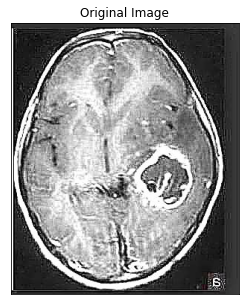

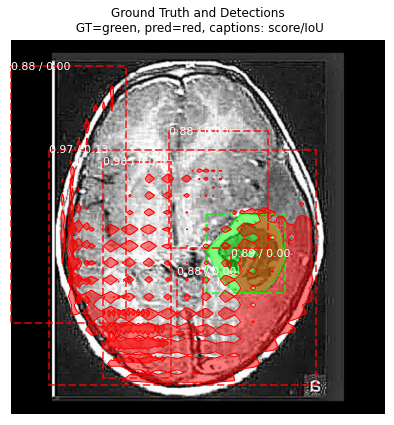

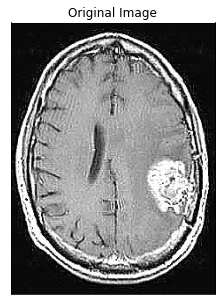

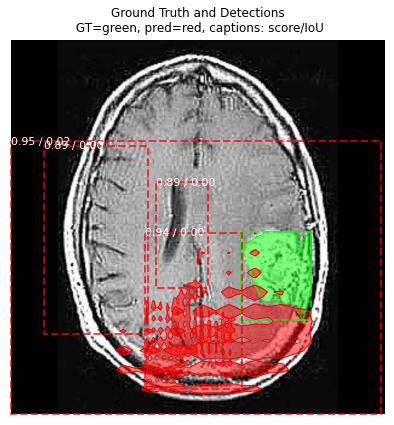

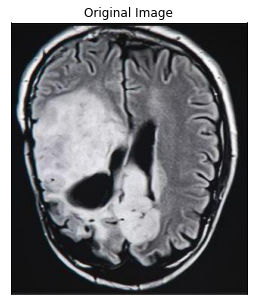

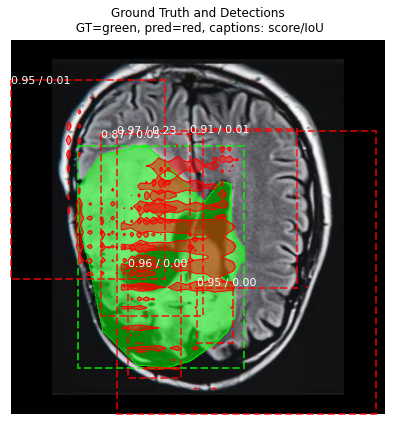

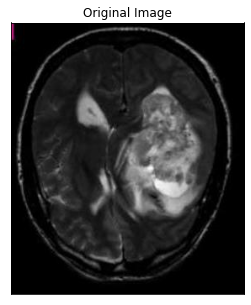

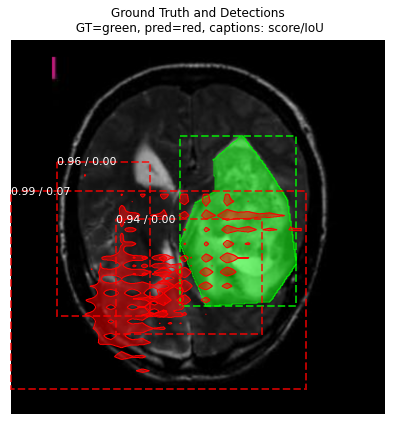

In [16]:
#vALIDATION SET
index= 10
display_image(data_validation, index)
plot_differences(data_validation, index)

index = 22
display_image(data_validation, index)
plot_differences(data_validation, index)

#Test Set
index = 1
display_image(data_test, index)
plot_differences(data_test, index)

index = 15
display_image(data_test, index)
plot_differences(data_test, index)

<div>I have create a second configuration with STEPS_PER_EPOCH as 10 and used the same learning rate 0.001.

In [17]:
class TumorConfig2(Config):
    NAME = 'tumorDetection2'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1  # background + tumor
    DETECTION_MIN_CONFIDENCE = 0.85    
    STEPS_PER_EPOCH = 10
    LEARNING_RATE = 0.001
    
config = TumorConfig2()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.85
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

<h3>Second Configuration training</h3>
<p>The model is trained and inferenced using the second configuration.

In [18]:
model = modellib.MaskRCNN(
    mode='training', 
    config=config, 
    model_dir=DEFAULT_LOGS_DIRECTORY
)

model.load_weights(
    COCO_MODEL_PATH, 
    by_name=True, 
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"]
)

In [19]:
data_train = Dataset()
data_train.scan(DATASET_DIR, 'train')
data_train.prepare()

data_validation = Dataset()
data_validation.scan(DATASET_DIR, 'val')
data_validation.prepare()

data_test = Dataset()
data_test.scan(DATASET_DIR, 'test')
data_test.prepare()


print("Training network heads")
model.train(
    data_train, data_validation,
    learning_rate=config.LEARNING_RATE,
    epochs=10,
    layers='heads'
)

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: logs/tumordetection220211213T1339/mask_rcnn_tumordetection2_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDist

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/Users/varshikchebrolu/opt/anacond

Epoch 1/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 4/10 [===========>..................] - ETA: 4:03 - loss: 3.8490 - rpn_class_loss: 0.0162 - rpn_bbox_loss: 1.3447 - mrcnn_class_loss: 0.4910 - mrcnn_bbox_loss: 0.9068 - mrcnn_mask_loss: 1.0904

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/10 [=================>............] - ETA: 2:36 - loss: 5.4641 - rpn_class_loss: 0.0454 - rpn_bbox_loss: 3.3206 - mrcnn_class_loss: 0.3318 - mrcnn_bbox_loss: 0.7385 - mrcnn_mask_loss: 1.0278

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/10 [====================>.........] - ETA: 1:55 - loss: 5.2782 - rpn_class_loss: 0.0462 - rpn_bbox_loss: 2.9869 - mrcnn_class_loss: 0.3149 - mrcnn_bbox_loss: 0.7976 - mrcnn_mask_loss: 1.1325

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 9/10 [==========================>...] - ETA: 38s - loss: 4.9651 - rpn_class_loss: 0.0582 - rpn_bbox_loss: 2.6769 - mrcnn_class_loss: 0.2622 - mrcnn_bbox_loss: 0.8215 - mrcnn_mask_loss: 1.1463 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 1645s 164s/step - loss: 4.7181 - rpn_class_loss: 0.0529 - rpn_bbox_loss: 2.4464 - mrcnn_class_loss: 0.2421 - mrcnn_bbox_loss: 0.8353 - mrcnn_mask_loss: 1.1414 - val_loss: 3.0734 - val_rpn_class_loss: 0.0185 - val_rpn_bbox_loss: 0.9918 - val_mrcnn_class_loss: 0.0792 - val_mrcnn_bbox_loss: 0.8622 - val_mrcnn_mask_loss: 1.1216
Epoch 2/10
 2/10 [=====>........................] - ETA: 4:59 - loss: 3.4182 - rpn_class_loss: 0.0228 - rpn_bbox_loss: 1.5122 - mrcnn_class_loss: 0.0602 - mrcnn_bbox_loss: 0.9234 - mrcnn_mask_loss: 0.8997

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/10 [====================>.........] - ETA: 1:51 - loss: 2.5002 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.5536 - mrcnn_class_loss: 0.0832 - mrcnn_bbox_loss: 0.8454 - mrcnn_mask_loss: 1.0052

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/10 [=======================>......] - ETA: 1:14 - loss: 2.4046 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.5123 - mrcnn_class_loss: 0.0835 - mrcnn_bbox_loss: 0.8183 - mrcnn_mask_loss: 0.9763

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 9/10 [==========================>...] - ETA: 37s - loss: 2.3855 - rpn_class_loss: 0.0126 - rpn_bbox_loss: 0.4844 - mrcnn_class_loss: 0.0821 - mrcnn_bbox_loss: 0.8436 - mrcnn_mask_loss: 0.9628 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 1632s 163s/step - loss: 2.7619 - rpn_class_loss: 0.0224 - rpn_bbox_loss: 1.0399 - mrcnn_class_loss: 0.0739 - mrcnn_bbox_loss: 0.7593 - mrcnn_mask_loss: 0.8665 - val_loss: 2.4060 - val_rpn_class_loss: 0.0225 - val_rpn_bbox_loss: 0.8208 - val_mrcnn_class_loss: 0.0647 - val_mrcnn_bbox_loss: 0.8513 - val_mrcnn_mask_loss: 0.6465
Epoch 3/10
 1/10 [==>...........................] - ETA: 5:29 - loss: 1.2514 - rpn_class_loss: 0.0013 - rpn_bbox_loss: 0.1213 - mrcnn_class_loss: 0.0776 - mrcnn_bbox_loss: 0.3300 - mrcnn_mask_loss: 0.7212

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 2/10 [=====>........................] - ETA: 4:55 - loss: 1.1622 - rpn_class_loss: 0.0112 - rpn_bbox_loss: 0.0840 - mrcnn_class_loss: 0.0737 - mrcnn_bbox_loss: 0.2912 - mrcnn_mask_loss: 0.7020

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 3/10 [========>.....................] - ETA: 4:17 - loss: 1.1490 - rpn_class_loss: 0.0127 - rpn_bbox_loss: 0.0647 - mrcnn_class_loss: 0.0527 - mrcnn_bbox_loss: 0.3487 - mrcnn_mask_loss: 0.6701

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 5/10 [==============>...............] - ETA: 3:04 - loss: 1.3559 - rpn_class_loss: 0.0097 - rpn_bbox_loss: 0.1518 - mrcnn_class_loss: 0.0640 - mrcnn_bbox_loss: 0.4579 - mrcnn_mask_loss: 0.6725

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 8/10 [=======================>......] - ETA: 1:13 - loss: 1.4688 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.1609 - mrcnn_class_loss: 0.0712 - mrcnn_bbox_loss: 0.5721 - mrcnn_mask_loss: 0.6524

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/10 [==========================>...] - ETA: 36s - loss: 1.4834 - rpn_class_loss: 0.0112 - rpn_bbox_loss: 0.1502 - mrcnn_class_loss: 0.0703 - mrcnn_bbox_loss: 0.6008 - mrcnn_mask_loss: 0.6510 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 1624s 162s/step - loss: 1.5030 - rpn_class_loss: 0.0102 - rpn_bbox_loss: 0.1726 - mrcnn_class_loss: 0.0776 - mrcnn_bbox_loss: 0.5897 - mrcnn_mask_loss: 0.6530 - val_loss: 2.4069 - val_rpn_class_loss: 0.0163 - val_rpn_bbox_loss: 0.7734 - val_mrcnn_class_loss: 0.0651 - val_mrcnn_bbox_loss: 0.9115 - val_mrcnn_mask_loss: 0.6405
Epoch 4/10
 4/10 [===========>..................] - ETA: 5:52 - loss: 2.0885 - rpn_class_loss: 0.0108 - rpn_bbox_loss: 0.5017 - mrcnn_class_loss: 0.0638 - mrcnn_bbox_loss: 0.8685 - mrcnn_mask_loss: 0.6436  

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/10 [=================>............] - ETA: 3:26 - loss: 2.0945 - rpn_class_loss: 0.0129 - rpn_bbox_loss: 0.3841 - mrcnn_class_loss: 0.0620 - mrcnn_bbox_loss: 0.9927 - mrcnn_mask_loss: 0.6429

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 7/10 [====================>.........] - ETA: 2:28 - loss: 2.2152 - rpn_class_loss: 0.0133 - rpn_bbox_loss: 0.5211 - mrcnn_class_loss: 0.0679 - mrcnn_bbox_loss: 0.9583 - mrcnn_mask_loss: 0.6545

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/10 [==========================>...] - ETA: 46s - loss: 2.0425 - rpn_class_loss: 0.0115 - rpn_bbox_loss: 0.4537 - mrcnn_class_loss: 0.0712 - mrcnn_bbox_loss: 0.8616 - mrcnn_mask_loss: 0.6446 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 1714s 171s/step - loss: 1.9552 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.4114 - mrcnn_class_loss: 0.0709 - mrcnn_bbox_loss: 0.8291 - mrcnn_mask_loss: 0.6334 - val_loss: 1.9307 - val_rpn_class_loss: 0.0197 - val_rpn_bbox_loss: 0.5198 - val_mrcnn_class_loss: 0.0649 - val_mrcnn_bbox_loss: 0.7086 - val_mrcnn_mask_loss: 0.6177
Epoch 5/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 1/10 [==>...........................] - ETA: 5:34 - loss: 2.1084 - rpn_class_loss: 0.0193 - rpn_bbox_loss: 0.4553 - mrcnn_class_loss: 0.0647 - mrcnn_bbox_loss: 0.8907 - mrcnn_mask_loss: 0.6784

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 5/10 [==============>...............] - ETA: 3:04 - loss: 1.8157 - rpn_class_loss: 0.0397 - rpn_bbox_loss: 0.4001 - mrcnn_class_loss: 0.0821 - mrcnn_bbox_loss: 0.6581 - mrcnn_mask_loss: 0.6356

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/10 [==========================>...] - ETA: 36s - loss: 1.7599 - rpn_class_loss: 0.0266 - rpn_bbox_loss: 0.3141 - mrcnn_class_loss: 0.0692 - mrcnn_bbox_loss: 0.7141 - mrcnn_mask_loss: 0.6359 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 2610s 261s/step - loss: 2.1403 - rpn_class_loss: 0.0455 - rpn_bbox_loss: 0.6508 - mrcnn_class_loss: 0.0743 - mrcnn_bbox_loss: 0.7329 - mrcnn_mask_loss: 0.6368 - val_loss: 2.2284 - val_rpn_class_loss: 0.0146 - val_rpn_bbox_loss: 0.4658 - val_mrcnn_class_loss: 0.0641 - val_mrcnn_bbox_loss: 1.0654 - val_mrcnn_mask_loss: 0.6184
Epoch 6/10
 3/10 [========>.....................] - ETA: 4:08 - loss: 1.8321 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.3316 - mrcnn_class_loss: 0.0417 - mrcnn_bbox_loss: 0.8488 - mrcnn_mask_loss: 0.6055

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 5/10 [==============>...............] - ETA: 2:57 - loss: 1.7589 - rpn_class_loss: 0.0107 - rpn_bbox_loss: 0.2553 - mrcnn_class_loss: 0.0426 - mrcnn_bbox_loss: 0.8633 - mrcnn_mask_loss: 0.5870

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 7/10 [====================>.........] - ETA: 1:46 - loss: 1.7111 - rpn_class_loss: 0.0097 - rpn_bbox_loss: 0.2591 - mrcnn_class_loss: 0.0504 - mrcnn_bbox_loss: 0.8199 - mrcnn_mask_loss: 0.5720

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/10 [=======================>......] - ETA: 1:11 - loss: 1.6135 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.2379 - mrcnn_class_loss: 0.0489 - mrcnn_bbox_loss: 0.7500 - mrcnn_mask_loss: 0.5675

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 9/10 [==========================>...] - ETA: 35s - loss: 1.6437 - rpn_class_loss: 0.0089 - rpn_bbox_loss: 0.2659 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.7290 - mrcnn_mask_loss: 0.5803 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 2633s 263s/step - loss: 1.6913 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.2875 - mrcnn_class_loss: 0.0661 - mrcnn_bbox_loss: 0.7441 - mrcnn_mask_loss: 0.5813 - val_loss: 1.8105 - val_rpn_class_loss: 0.0124 - val_rpn_bbox_loss: 0.3077 - val_mrcnn_class_loss: 0.0558 - val_mrcnn_bbox_loss: 0.8467 - val_mrcnn_mask_loss: 0.5879
Epoch 7/10
 3/10 [========>.....................] - ETA: 4:12 - loss: 1.4202 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.2312 - mrcnn_class_loss: 0.0775 - mrcnn_bbox_loss: 0.5147 - mrcnn_mask_loss: 0.5929

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 4/10 [===========>..................] - ETA: 3:37 - loss: 1.3305 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.2093 - mrcnn_class_loss: 0.0677 - mrcnn_bbox_loss: 0.4865 - mrcnn_mask_loss: 0.5631

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/10 [=================>............] - ETA: 2:25 - loss: 1.4680 - rpn_class_loss: 0.0074 - rpn_bbox_loss: 0.2084 - mrcnn_class_loss: 0.0892 - mrcnn_bbox_loss: 0.5887 - mrcnn_mask_loss: 0.5743

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/10 [=======================>......] - ETA: 1:12 - loss: 1.5969 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.2688 - mrcnn_class_loss: 0.0773 - mrcnn_bbox_loss: 0.6463 - mrcnn_mask_loss: 0.5923

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 9/10 [==========================>...] - ETA: 36s - loss: 1.6825 - rpn_class_loss: 0.0134 - rpn_bbox_loss: 0.2752 - mrcnn_class_loss: 0.0816 - mrcnn_bbox_loss: 0.7154 - mrcnn_mask_loss: 0.5968 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 1633s 163s/step - loss: 1.6997 - rpn_class_loss: 0.0131 - rpn_bbox_loss: 0.2707 - mrcnn_class_loss: 0.0813 - mrcnn_bbox_loss: 0.7370 - mrcnn_mask_loss: 0.5977 - val_loss: 1.4961 - val_rpn_class_loss: 0.0120 - val_rpn_bbox_loss: 0.3604 - val_mrcnn_class_loss: 0.0675 - val_mrcnn_bbox_loss: 0.5481 - val_mrcnn_mask_loss: 0.5081
Epoch 8/10
 2/10 [=====>........................] - ETA: 4:49 - loss: 2.2139 - rpn_class_loss: 0.0992 - rpn_bbox_loss: 0.9682 - mrcnn_class_loss: 0.0234 - mrcnn_bbox_loss: 0.6714 - mrcnn_mask_loss: 0.4516

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/10 [=================>............] - ETA: 2:25 - loss: 1.5785 - rpn_class_loss: 0.0407 - rpn_bbox_loss: 0.4827 - mrcnn_class_loss: 0.0492 - mrcnn_bbox_loss: 0.5379 - mrcnn_mask_loss: 0.4681

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/10 [=======================>......] - ETA: 1:12 - loss: 1.7325 - rpn_class_loss: 0.0359 - rpn_bbox_loss: 0.5714 - mrcnn_class_loss: 0.0405 - mrcnn_bbox_loss: 0.6014 - mrcnn_mask_loss: 0.4833

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 9/10 [==========================>...] - ETA: 36s - loss: 1.6386 - rpn_class_loss: 0.0320 - rpn_bbox_loss: 0.5178 - mrcnn_class_loss: 0.0405 - mrcnn_bbox_loss: 0.5763 - mrcnn_mask_loss: 0.4721 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 1621s 162s/step - loss: 1.5541 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.4767 - mrcnn_class_loss: 0.0386 - mrcnn_bbox_loss: 0.5477 - mrcnn_mask_loss: 0.4614 - val_loss: 1.5577 - val_rpn_class_loss: 0.0146 - val_rpn_bbox_loss: 0.3956 - val_mrcnn_class_loss: 0.0716 - val_mrcnn_bbox_loss: 0.5817 - val_mrcnn_mask_loss: 0.4941
Epoch 9/10
 1/10 [==>...........................] - ETA: 5:20 - loss: 1.3870 - rpn_class_loss: 0.0040 - rpn_bbox_loss: 0.1230 - mrcnn_class_loss: 0.0245 - mrcnn_bbox_loss: 0.8800 - mrcnn_mask_loss: 0.3554

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 5/10 [==============>...............] - ETA: 2:58 - loss: 1.5522 - rpn_class_loss: 0.0147 - rpn_bbox_loss: 0.3631 - mrcnn_class_loss: 0.0440 - mrcnn_bbox_loss: 0.6662 - mrcnn_mask_loss: 0.4641

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 6/10 [=================>............] - ETA: 2:22 - loss: 1.4902 - rpn_class_loss: 0.0166 - rpn_bbox_loss: 0.3583 - mrcnn_class_loss: 0.0452 - mrcnn_bbox_loss: 0.6068 - mrcnn_mask_loss: 0.4632

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 8/10 [=======================>......] - ETA: 1:11 - loss: 1.4210 - rpn_class_loss: 0.0157 - rpn_bbox_loss: 0.3131 - mrcnn_class_loss: 0.0467 - mrcnn_bbox_loss: 0.5841 - mrcnn_mask_loss: 0.4614

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 9/10 [==========================>...] - ETA: 35s - loss: 1.3476 - rpn_class_loss: 0.0141 - rpn_bbox_loss: 0.2901 - mrcnn_class_loss: 0.0452 - mrcnn_bbox_loss: 0.5565 - mrcnn_mask_loss: 0.4417 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 1616s 162s/step - loss: 1.3248 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 0.2700 - mrcnn_class_loss: 0.0537 - mrcnn_bbox_loss: 0.5490 - mrcnn_mask_loss: 0.4384 - val_loss: 1.5076 - val_rpn_class_loss: 0.0108 - val_rpn_bbox_loss: 0.4604 - val_mrcnn_class_loss: 0.0700 - val_mrcnn_bbox_loss: 0.5307 - val_mrcnn_mask_loss: 0.4358
Epoch 10/10


/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


 5/10 [==============>...............] - ETA: 3:02 - loss: 1.0424 - rpn_class_loss: 0.0212 - rpn_bbox_loss: 0.0778 - mrcnn_class_loss: 0.0810 - mrcnn_bbox_loss: 0.5184 - mrcnn_mask_loss: 0.3440

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

 9/10 [==========================>...] - ETA: 36s - loss: 1.1277 - rpn_class_loss: 0.0165 - rpn_bbox_loss: 0.1663 - mrcnn_class_loss: 0.0753 - mrcnn_bbox_loss: 0.5133 - mrcnn_mask_loss: 0.3561 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/Users/varshikchebrolu/opt/anaconda3/envs/ML_project/lib/python3.6/site-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. 

10/10 [==============================] - 1605s 161s/step - loss: 1.1549 - rpn_class_loss: 0.0153 - rpn_bbox_loss: 0.1718 - mrcnn_class_loss: 0.0726 - mrcnn_bbox_loss: 0.5227 - mrcnn_mask_loss: 0.3723 - val_loss: 1.4296 - val_rpn_class_loss: 0.0103 - val_rpn_bbox_loss: 0.2957 - val_mrcnn_class_loss: 0.0604 - val_mrcnn_bbox_loss: 0.6467 - val_mrcnn_mask_loss: 0.4166


In [21]:
model = modellib.MaskRCNN(
    mode="inference", 
    config=config,
    model_dir=DEFAULT_LOGS_DIR
)


model_path = model.find_last()


print("Loading:", model_path)
model.load_weights(model_path, by_name=True)

Loading: logs/tumordetection220211213T1339/mask_rcnn_tumordetection2_0010.h5
Re-starting from epoch 10


In [23]:
def plot_differences(dataset, img_id):
    original_image, image_meta, gt_class_id, gt_box, gt_mask =\
        modellib.load_image_gt(dataset, config, 
                               img_id, use_mini_mask=False)

    results = model.detect([original_image], verbose=0)
    r = results[0]

    visualize.display_differences(
        original_image,
        gt_box, gt_class_id, gt_mask,
        r['rois'], r['class_ids'], r['scores'], r['masks'],
        class_names = ['tumor'], title="", ax=get_auxilary(),
        show_mask=True, show_box=True)
    

def display_image(dataset, ind):
    plt.figure(figsize=(5,5))
    plt.imshow(dataset.load_image(ind))
    plt.xticks([])
    plt.yticks([])
    plt.title('Original Image')
    plt.show()

<div>These are the results of the second configuration where the learning rate is 0.001 and number of steps per epoch is 10.

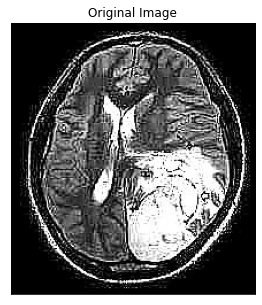

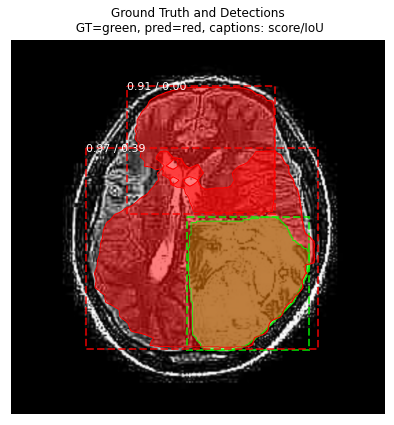

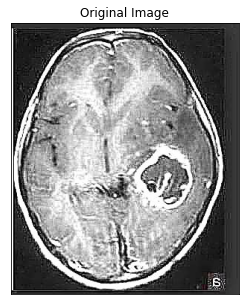

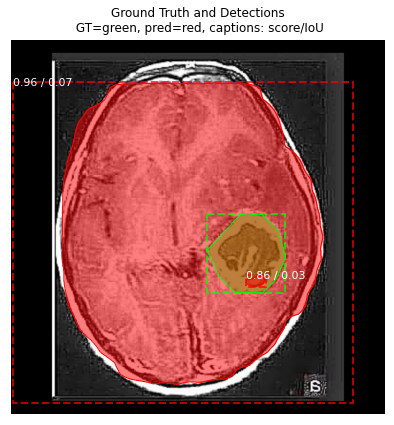

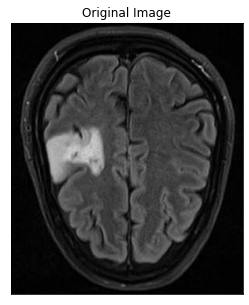

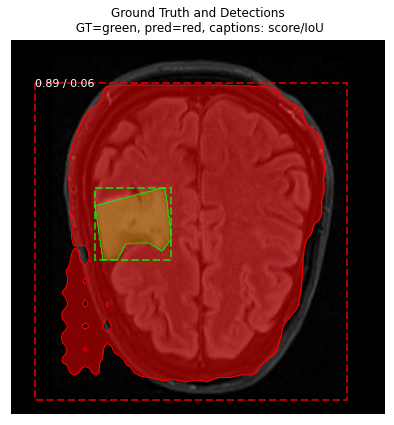

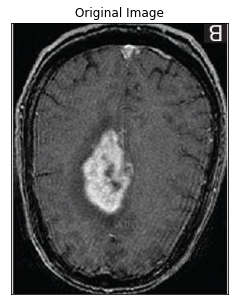

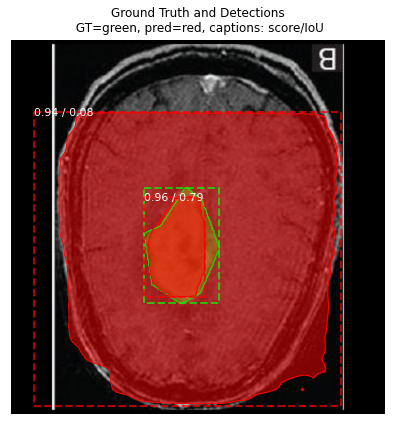

In [25]:
#vALIDATION SET
index= 1
display_image(data_validation, index)
plot_differences(data_validation, index)

index = 10
display_image(data_validation, index)
plot_differences(data_validation, index)

#Test Set
index = 2
display_image(data_test, index)
plot_differences(data_test, index)

index = 6
display_image(data_test, index)
plot_differences(data_test, index)

# Results

<div>I have experimented the detection of the brain tumors by changing number of steps per epoch and the results are shown in the above images.As we can see that when the model is trained with less no of epoches, the results are far off from the original tumor.But as I increase the number of epoches,the percentage of the tumor detection increased but still there are still some percentage of the random things detected instead of the tumor,although it was of less percentage.

In [39]:
import io
import nbformat
import glob
nbfile = glob.glob('Project-Brain Tumor detection-varshik chebrolu.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file Project-Brain Tumor detection-varshik chebrolu.ipynb is 2152


# References

<div>1.<a>https://www.kaggle.com/ahmedhamada0/brain-tumor-detection</a>
<div>2.<a>https://github.com/nageshsinghc4/Brain-Tumor-Detection-using-Mask-R-CNN/blob/master/Brain-Tumor-Detection.ipynb</a>
<div>3.<a>https://blog.paperspace.com/mask-r-cnn-in-tensorflow-2-0/</a>
<div>4.<a>https://developers.arcgis.com/python/guide/how-maskrcnn-works/</a>